In [5]:
import numpy as np
from scipy.optimize import minimize
from scipy.io import loadmat
from math import sqrt

import matplotlib.pyplot as plt
import time

In [6]:
mat = loadmat('mnist_all.mat')

In [7]:
start_time = time.time()

merged_train_data = []
merged_train_label = []
merged_test_data = []
merged_test_label = []
# yl = np.zeros((10,1))
for key in mat.keys():
    yl = np.zeros((10,1), dtype= np.uintc)
    if("train" in key):
        merged_train_data.append(mat[key])
        yl[int(key[-1])] = 1
        merged_train_label.append(np.full((len(mat[key]), yl.shape[0]), yl.flatten()))
    if("test" in key):
        merged_test_data.append(mat[key])
        yl[int(key[-1])] = 1
        merged_test_label.append(np.full((len(mat[key]), yl.shape[0]),  yl.flatten()))

#converting list of arrays to NDarray
merged_train_data = np.vstack(merged_train_data)
merged_train_label = np.vstack(merged_train_label)
test_data = np.vstack(merged_test_data)
test_label = np.vstack(merged_test_label)

#feature selection
column_indices = []
for i in range(784):
    if(i <= 84 or i>= 700):
        column_indices.append(i)
    if(i % 28 == 0):
        for j in range(i, i+4):
            column_indices.append(j)

arr = np.array(range(784)).reshape(28,28)
right_index=[]
for i in arr:
    for j in range(4):
        column_indices.append(i[-4]+j)

#cropped data shape 22x20
merged_train_data =  np.delete(merged_train_data, column_indices, axis = 1)
test_data = np.delete(test_data, column_indices, axis = 1)

#splitting data randomly
train_data_height = merged_train_data.shape[0]
train_data_width = merged_train_data.shape[1]
random_indices = np.random.choice(range(train_data_height), 60000, replace=False)
train_data = np.empty((50000, train_data_width))
train_label = np.empty((50000, merged_train_label.shape[1]), dtype=np.uintc)
validation_data = np.empty((10000, train_data_width))
validation_label = np.empty((10000, merged_train_label.shape[1]), dtype=np.uintc)
for index, randi in enumerate(random_indices[:50000]):
    train_data[index] = merged_train_data[randi]
    train_label[index] = merged_train_label[randi]
for index, randi in enumerate(random_indices[50000:]):
    validation_data[index] = merged_train_data[randi]
    validation_label[index] = merged_train_label[randi]

print(">> %.2f seconds" % (time.time() - start_time))

>> 0.50 seconds


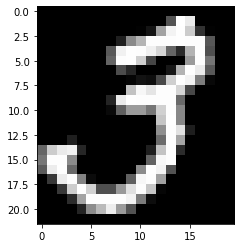

In [8]:
train_data[0] = train_data[0]/255
plt.gray()
plt.imshow(train_data[0].reshape((22,20)))

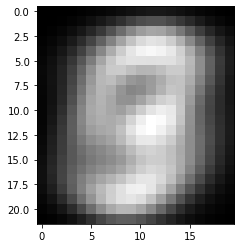

In [9]:
plt.gray()
plt.imshow(merged_train_data.sum(axis=0).reshape((22,20)))